In [33]:
# Import necessary dependencies and settings

In [34]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import pandas as pd
import re
import nltk


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout


## Loading the Files

In [166]:
imdb_path = '/Users/jairomelo/Desktop/ML/YORK/ML1010/FinalProject/txtImdb'

# Load the dataset
train_texts = []
train_labels = []
test_texts = []
test_labels = []
for dset in ['train', 'test']:
    for cat in ['pos', 'neg']:
        dset_path = os.path.join(imdb_path, dset, cat)
        for fname in sorted(os.listdir(dset_path)):
            if fname.endswith('.txt'):
                with open(os.path.join(dset_path, fname)) as f:
                    if dset == 'train': train_texts.append(f.read())
                    else: test_texts.append(f.read())
                label = 0 if cat == 'neg' else 1
                if dset == 'train': train_labels.append(label)
                else: test_labels.append(label)

# Converting to np.array
train_texts = np.array(train_texts)
train_labels = np.array(train_labels)
test_texts = np.array(test_texts)
test_labels = np.array(test_labels)



In [158]:
#Development

dev_imdb_path = '/Users/jairomelo/Desktop/ML/YORK/ML1010/FinalProject/txtImdb/train'

dev_texts = []
for fname in sorted(os.listdir(dev_imdb_path)):
    if fname.endswith('.txt'):
        with open(os.path.join(dev_imdb_path, fname)) as f:
            dev_texts.append(f.read())

# Converting to np.array
dev_texts = np.array(dev_texts)


In [160]:
print ('Train samples :', train_texts.shape)
print ('Train labels  :', train_labels.shape)
print ('Test samples  :', test_texts.shape)
print ('Test labels   :', test_labels.shape)
print ('Dev samples   :', dev_texts.shape)


Train samples : (25000,)
Train labels  : (25000,)
Test samples  : (25000,)
Test labels   : (25000,)
Dev samples   : (3,)


In [47]:
size_of_samp = 10
rand_samples_to_check = np.random.randint(len(train_texts), size=size_of_samp)

for samp_num in rand_samples_to_check:
    print ('__________________________________________________')
    print (train_texts[samp_num], '||', train_labels[samp_num])
    print ('__________________________________________________')

__________________________________________________
"Atlantis: The Lost Empire" was everything the previews indicated it would be. It is not often you find that. Most of the time, the previews show only the best parts and then the rest of the movie is terrible. Not so with this one. I was pleased with the original plot, even though the sub-plots were not. The animation was not break through like "Shrek" but it was good, none the less. The plot and the story line were well presented and there were only a few slow spots in them. This keeps you interested. I found myself enjoying this one. "Atlantis" gets and keeps your attention. You also have to think a little bit, but not too much. Once you think about it a little, you can figure out what needs to happen but you really don't know for sure how it is going to happen.<br /><br />The casting was also good. Michael J. Fox, as Milo was an excellent choice. His personality fits nicely. The gruff natured Commander Rourke was also well chosen wi

In [ ]:
# 3. Data Cleaning and Data Exploration

Remove HTML characters
Remove all punctuation from words.
Remove all words that are known stop words.
Remove all words less than one character
Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language
Lemmatizer



In [117]:
#Functions for cleaning HTML tags and punctuation 
import re
def clean_html(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def clean_punc(word):
    cleaned = re.sub(r'[?|!|\'|#]', r'', word)
    cleaned = re.sub(r'[.|,|)|(|\|/]', r' ', cleaned)
    return cleaned


In [167]:
#Getting Stopwords
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
#from nltk.stem.wordnet import WordNetLemmatizer
stop = stopwords.words('english')
sno = SnowballStemmer('english')
print (stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jairomelo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [168]:

final_string = []
s = ''

for sentence in train_texts:
    filtered_sentence = []
    sentence = clean_html(sentence)
    for word in sentence.split():
        for cleaned_word in clean_punc(word).split():
            if (cleaned_word.isalpha() and (len(cleaned_word) > 2) and cleaned_word not in stop):
                s = (sno.stem(cleaned_word.lower())).encode('utf8')
                filtered_sentence.append(s)
            else:
                continue
    strl = b' '.join(filtered_sentence)
    final_string.append(strl.decode('utf8'))

    



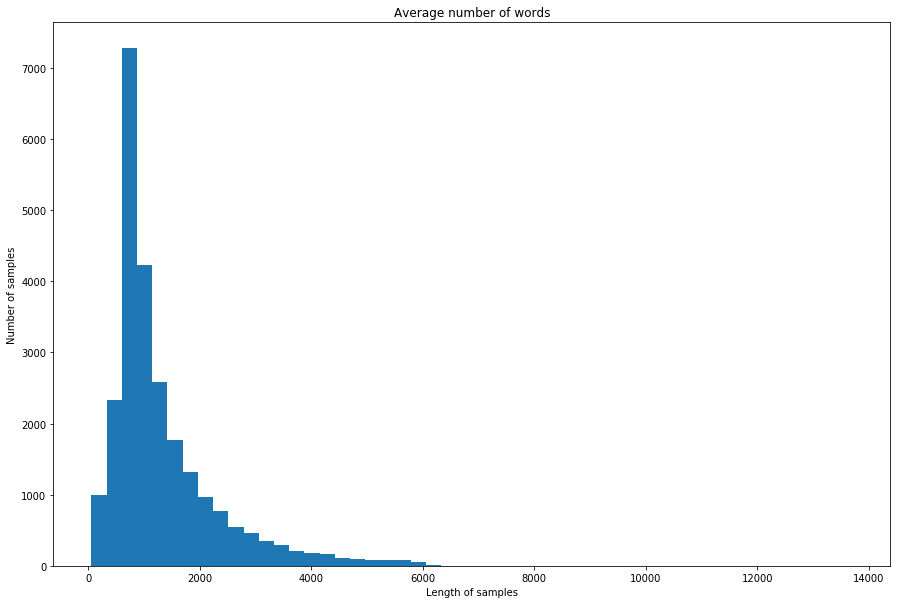

In [66]:
plt.figure(figsize=(15, 10))
plt.hist([len(sample) for sample in list(train_texts)], 50)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Average number of words')
plt.show()

Create a frequency distribution of all words

## Vectorizing

Let's now plot a frequency distribution plot of the most seen words in the corpus.

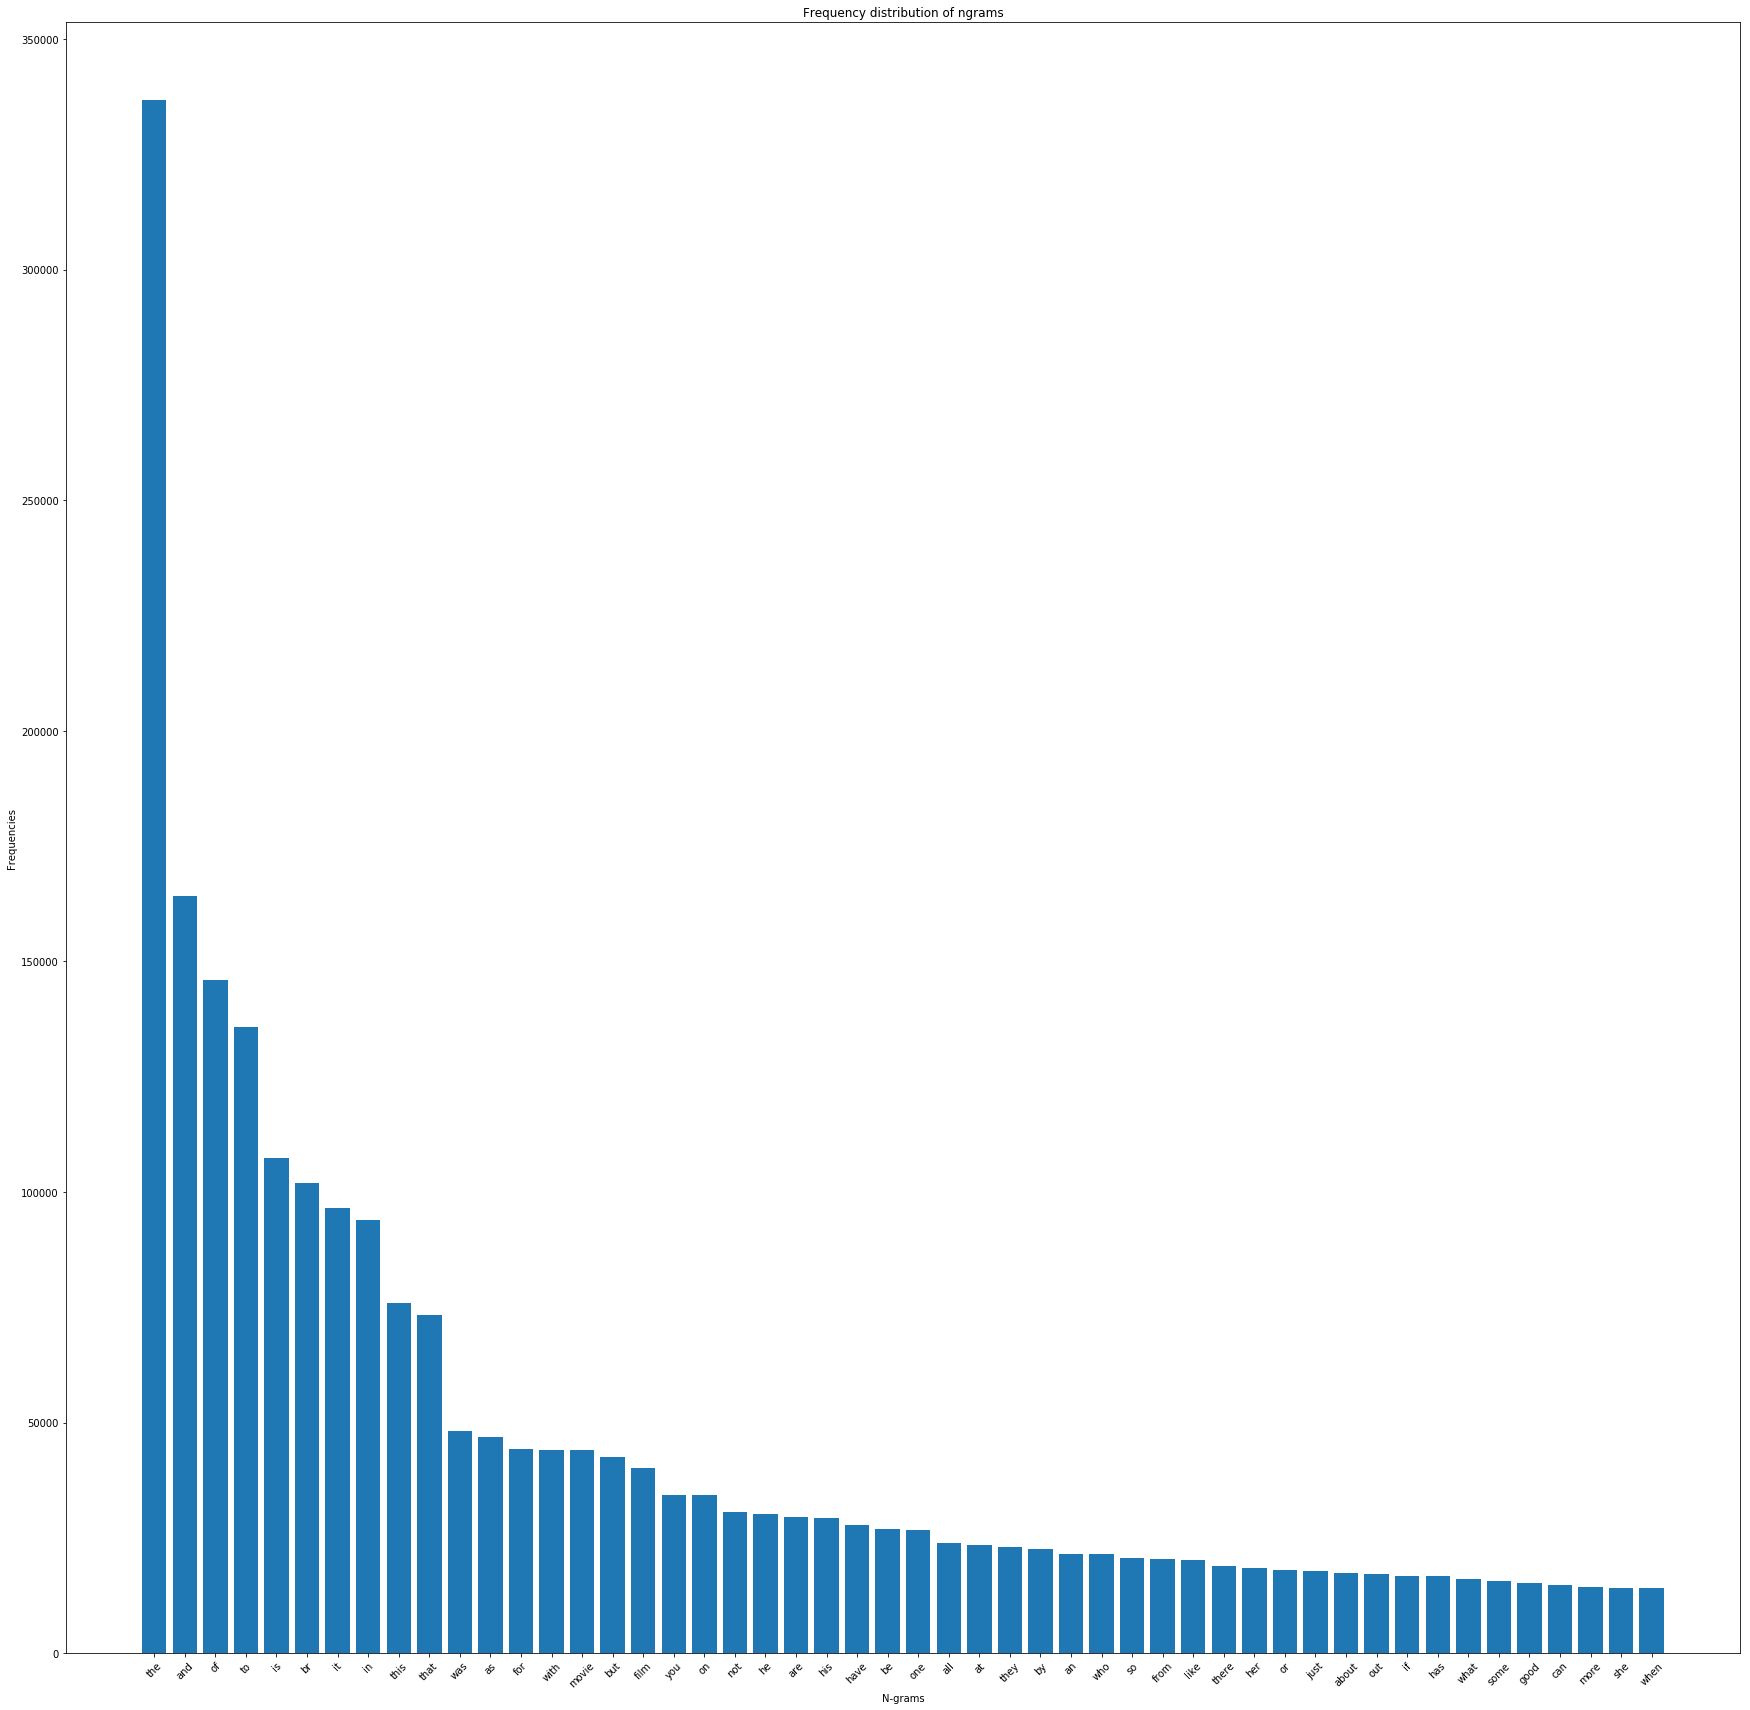

In [67]:

kwargs = {
    'ngram_range' : (1, 1),
    'dtype' : 'int32',
    'strip_accents' : 'unicode',
    'decode_error' : 'replace',
    'analyzer' : 'word'
}

vectorizer = CountVectorizer(**kwargs)
vect_texts = vectorizer.fit_transform(list(train_texts))
all_ngrams = vectorizer.get_feature_names()
num_ngrams = min(50, len(all_ngrams))
all_counts = vect_texts.sum(axis=0).tolist()[0]

all_ngrams, all_counts = zip(*[(n, c) for c, n in sorted(zip(all_counts, all_ngrams), reverse=True)])
ngrams = all_ngrams[:num_ngrams]
counts = all_counts[:num_ngrams]

idx = np.arange(num_ngrams)

plt.figure(figsize=(30, 30))
plt.bar(idx, counts, width=0.8)
plt.xlabel('N-grams')
plt.ylabel('Frequencies')
plt.title('Frequency distribution of ngrams')
plt.xticks(idx, ngrams, rotation=45)
plt.show()

Positive words


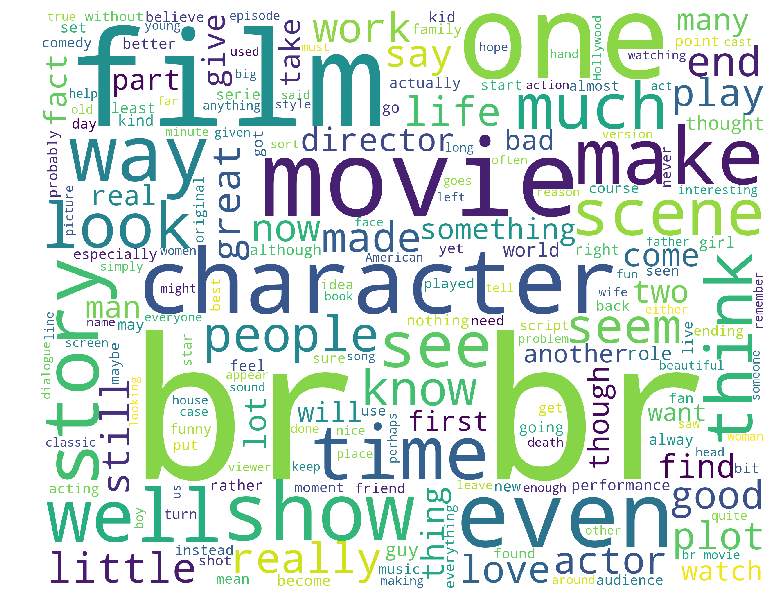

In [68]:
from wordcloud import WordCloud,STOPWORDS

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if not word.startswith(',')
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_texts,'white')


In [153]:
#Creating clean data file for training

ab = np.zeros(len(final_string), dtype=[('text', 'U10000'), ('label', int)])
ab['text'] = final_string
ab['label'] = train_labels

np.savetxt('train.txt', ab, fmt="%s %i")

#creating a test file

ab = np.zeros(len(test_texts), dtype=[('text', 'U10000'), ('label', int)])
ab['text'] = test_texts
ab['label'] = test_labels

np.savetxt('test.txt', ab, fmt="%s %i")


In [165]:
from flair.embeddings import WordEmbeddings

# init embedding
glove_embedding = WordEmbeddings('glove')

# create sentence.
sentence = Sentence('The grass is green .')

# embed a sentence using glove.
glove_embedding.embed(sentence)

# now check out the embedded tokens.
for token in sentence:
    print(token)
    print(token.embedding)

Token: 1 The
tensor([-0.0382, -0.2449,  0.7281, -0.3996,  0.0832,  0.0440, -0.3914,  0.3344,
        -0.5755,  0.0875,  0.2879, -0.0673,  0.3091, -0.2638, -0.1323, -0.2076,
         0.3340, -0.3385, -0.3174, -0.4834,  0.1464, -0.3730,  0.3458,  0.0520,
         0.4495, -0.4697,  0.0263, -0.5415, -0.1552, -0.1411, -0.0397,  0.2828,
         0.1439,  0.2346, -0.3102,  0.0862,  0.2040,  0.5262,  0.1716, -0.0824,
        -0.7179, -0.4153,  0.2033, -0.1276,  0.4137,  0.5519,  0.5791, -0.3348,
        -0.3656, -0.5486, -0.0629,  0.2658,  0.3020,  0.9977, -0.8048, -3.0243,
         0.0125, -0.3694,  2.2167,  0.7220, -0.2498,  0.9214,  0.0345,  0.4674,
         1.1079, -0.1936, -0.0746,  0.2335, -0.0521, -0.2204,  0.0572, -0.1581,
        -0.3080, -0.4162,  0.3797,  0.1501, -0.5321, -0.2055, -1.2526,  0.0716,
         0.7056,  0.4974, -0.4206,  0.2615, -1.5380, -0.3022, -0.0734, -0.2831,
         0.3710, -0.2522,  0.0162, -0.0171, -0.3898,  0.8742, -0.7257, -0.5106,
        -0.5203, -0.1459,  

## Stacked Embeddings

In [163]:
from flair.embeddings import WordEmbeddings, CharacterEmbeddings

# init standard GloVe embedding
glove_embedding = WordEmbeddings('glove')

# init standard character embeddings
character_embeddings = CharacterEmbeddings()


from flair.embeddings import StackedEmbeddings

# now create the StackedEmbedding object that combines all embeddings
stacked_embeddings = StackedEmbeddings(
    embeddings=[glove_embedding, character_embeddings])


    

In [164]:
print(train_texts[1])

Token: 2 is


In [77]:
from flair.data import Sentence

# Make a sentence object by passing an untokenized string and the 'use_tokenizer' flag
sentence = Sentence(train_texts[1], use_tokenizer=True)

# Print the object to see what's in there
print(sentence)


from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings

# create a StackedEmbedding object that combines glove and forward/backward flair embeddings
stacked_embeddings = StackedEmbeddings([
                                        WordEmbeddings('glove'), 
                                        FlairEmbeddings('news-forward'), 
                                        FlairEmbeddings('news-backward'),
                                       ])

# just embed a sentence using the StackedEmbedding as you would with any single embedding.
stacked_embeddings.embed(sentence)

# now check out the embedded tokens.
for token in sentence:
    print(token)
    print(token.embedding)

Sentence: "Homelessness ( or Houselessness as George Carlin stated ) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going to school , work , or vote for the matter . Most people think of the homeless as just a lost cause while worrying about things such as racism , the war on Iraq , pressuring kids to succeed , technology , the elections , inflation , or worrying if they 'll be next to end up on the streets. < br />< br /> But what if you were given a bet to live on the streets for a month without the luxuries you once had from a home , the entertainment sets , a bathroom , pictures on the wall , a computer , and everything you once treasure to see what it 's like to be homeless ? That is Goddard Bolt 's lesson. < br />< br /> Mel Brooks ( who directs ) who stars as Bolt plays a rich man who has everything in the world until deciding to make a bet with a sissy rival ( Jeffery Tambor ) to see if he can liv

100%|██████████| 160000128/160000128 [01:00<00:00, 2625347.84B/s]

2019-04-09 11:45:02,178 copying /var/folders/ks/_nr9fqcj7r19x4wk3nzmk4y00000gn/T/tmppl58njyd to cache at /Users/jairomelo/.flair/embeddings/glove.gensim.vectors.npy


2019-04-09 11:45:02,394 removing temp file /var/folders/ks/_nr9fqcj7r19x4wk3nzmk4y00000gn/T/tmppl58njyd
2019-04-09 11:45:02,970 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/glove.gensim not found in cache, downloading to /var/folders/ks/_nr9fqcj7r19x4wk3nzmk4y00000gn/T/tmp1j01wmoc


100%|██████████| 21494764/21494764 [01:28<00:00, 243672.11B/s]

2019-04-09 11:46:31,844 copying /var/folders/ks/_nr9fqcj7r19x4wk3nzmk4y00000gn/T/tmp1j01wmoc to cache at /Users/jairomelo/.flair/embeddings/glove.gensim
2019-04-09 11:46:31,880 removing temp file /var/folders/ks/_nr9fqcj7r19x4wk3nzmk4y00000gn/T/tmp1j01wmoc


2019-04-09 11:46:33,162 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.1/big-news-forward--h2048-l1-d0.05-lr30-0.25-20/news-forward-0.4.1.pt not found in cache, downloading to /var/folders/ks/_nr9fqcj7r19x4wk3nzmk4y00000gn/T/tmp6hlff6fn


100%|██████████| 73034624/73034624 [00:32<00:00, 2228245.68B/s]

2019-04-09 11:47:06,578 copying /var/folders/ks/_nr9fqcj7r19x4wk3nzmk4y00000gn/T/tmp6hlff6fn to cache at /Users/jairomelo/.flair/embeddings/news-forward-0.4.1.pt


2019-04-09 11:47:06,694 removing temp file /var/folders/ks/_nr9fqcj7r19x4wk3nzmk4y00000gn/T/tmp6hlff6fn
2019-04-09 11:47:07,455 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.1/big-news-backward--h2048-l1-d0.05-lr30-0.25-20/news-backward-0.4.1.pt not found in cache, downloading to /var/folders/ks/_nr9fqcj7r19x4wk3nzmk4y00000gn/T/tmpklj_46j2


100%|██████████| 73034575/73034575 [00:32<00:00, 2277201.99B/s]

2019-04-09 11:47:40,228 copying /var/folders/ks/_nr9fqcj7r19x4wk3nzmk4y00000gn/T/tmpklj_46j2 to cache at /Users/jairomelo/.flair/embeddings/news-backward-0.4.1.pt


2019-04-09 11:47:40,338 removing temp file /var/folders/ks/_nr9fqcj7r19x4wk3nzmk4y00000gn/T/tmpklj_46j2
Token: 1 Homelessness
tensor([ 0.2372,  0.6852,  0.1009,  ..., -0.0017, -0.0583,  0.0084])
Token: 2 (
tensor([1.9247e-01, 3.6617e-01, 5.2301e-01,  ..., 1.4305e-05, 1.8182e-03,
        2.8446e-01])
Token: 3 or
tensor([ 0.3104,  0.6486,  0.2848,  ..., -0.0010,  0.0028,  0.0094])
Token: 4 Houselessness
tensor([ 0.0000,  0.0000,  0.0000,  ..., -0.0007, -0.0119,  0.0028])
Token: 5 as
tensor([-3.2721e-01,  9.6446e-02,  3.4244e-01,  ...,  1.6362e-04,
        -1.3055e-02,  1.7150e-02])
Token: 6 George
tensor([-4.4295e-01,  5.9694e-02,  7.8306e-02,  ..., -2.0309e-04,
         1.3099e-02,  3.9280e-03])
Token: 7 Carlin
tensor([ 3.2867e-03, -1.3167e-01, -2.7668e-02,  ..., -7.8604e-05,
         4.3960e-03,  1.9513e-02])
Token: 8 stated
tensor([-9.4885e-02, -4.7378e-01, -1.4386e-01,  ..., -1.8051e-04,
         3.2054e-04,  2.3146e-03])
Token: 9 )
tensor([-1.3797e-01,  2.7084e-01,  8.4036e-01,  ...

tensor([-0.0382, -0.2449,  0.7281,  ..., -0.0038, -0.0302,  0.0415])
Token: 332 streets
tensor([ 0.0656, -0.0439, -0.0938,  ..., -0.0001, -0.0040,  0.0042])
Token: 333 .
tensor([-3.3979e-01,  2.0941e-01,  4.6348e-01,  ..., -4.4431e-05,
         3.8951e-03,  4.1186e-03])
Token: 334 They
tensor([-7.9540e-02,  3.0171e-01,  7.9516e-02,  ..., -2.5436e-03,
         7.9772e-05,  9.1547e-03])
Token: 335 're
tensor([-4.4691e-02,  5.5320e-01,  8.3203e-01,  ...,  1.5987e-04,
        -3.2950e-04,  4.3712e-02])
Token: 336 survivors
tensor([ 3.6678e-02,  1.3382e+00, -1.7764e-01,  ..., -5.8065e-04,
        -2.4391e-03,  2.0388e-03])
Token: 337 .
tensor([-3.3979e-01,  2.0941e-01,  4.6348e-01,  ..., -7.8706e-05,
         4.6942e-03,  4.4662e-03])
Token: 338 Bolt
tensor([ 0.1951,  0.2659, -0.1563,  ..., -0.0056, -0.0053, -0.0012])
Token: 339 is
tensor([-0.5426,  0.4148,  1.0322,  ..., -0.0055,  0.0103,  0.0037])
Token: 340 n't
tensor([ 1.5731e-01,  3.9530e-01,  6.3586e-01,  ..., -6.0935e-03,
         2.

## Creating a Corpus

In [162]:
#Loading the clean data and corpus

from flair.data import TaggedCorpus
from flair.data_fetcher import NLPTaskDataFetcher

# define columns
columns = {0: 'text', 1: 'pos', 2: 'ner'}

# this is the folder in which train, test and dev files reside
data_folder = '/Users/jairomelo/Desktop/ML/YORK/ML1010/FinalProject'
# retrieve corpus using column format, data folder and the names of the train, dev and test files
corpus: TaggedCorpus = NLPTaskDataFetcher.load_column_corpus(data_folder, columns,
                                                              train_file='train.txt',
                                                              test_file='test.txt',
                                                              dev_file='dev.txt')

2019-04-09 15:28:27,259 Reading data from /Users/jairomelo/Desktop/ML/YORK/ML1010/FinalProject
2019-04-09 15:28:27,260 Train: /Users/jairomelo/Desktop/ML/YORK/ML1010/FinalProject/train.txt
2019-04-09 15:28:27,261 Dev: /Users/jairomelo/Desktop/ML/YORK/ML1010/FinalProject/dev.txt
2019-04-09 15:28:27,262 Test: /Users/jairomelo/Desktop/ML/YORK/ML1010/FinalProject/test.txt


# Data Preparation
We will get bigrams and unigrams from the data and encode it using tf-idf. From it, we will select the top 20000 features from the vector of tokens. Discard features that occurs less than two times, and will f_classif to get feature importance.

## Vectorize the data

In [16]:
NGRAM_RANGE = (1, 2)
TOP_K = 20000
TOKEN_MODE = 'word'
MIN_DOC_FREQ = 2

kwargs = {
    'ngram_range' : NGRAM_RANGE,
    'dtype' : 'int32',
    'strip_accents' : 'unicode',
    'decode_error' : 'replace',
    'analyzer' : TOKEN_MODE,
    'min_df' : MIN_DOC_FREQ,
}
    
# Learn Vocab from train texts and vectorize train and val sets
tfidf_vectorizer = TfidfVectorizer(**kwargs)
x_train = tfidf_vectorizer.fit_transform(train_texts)
x_val = tfidf_vectorizer.transform(test_texts)

# Select best k features, with feature importance measured by f_classif
selector = SelectKBest(f_classif, k=min(TOP_K, x_train.shape[1]))
selector.fit(x_train, train_labels)
x_train = selector.transform(x_train).astype('float32')
x_val = selector.transform(x_val).astype('float32')


# Flair Embeddings

In [ ]:
from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings

# create a StackedEmbedding object that combines glove and forward/backward flair embeddings
stacked_embeddings = StackedEmbeddings([
                                        WordEmbeddings('glove'), 
                                        FlairEmbeddings('news-forward'), 
                                        FlairEmbeddings('news-backward'),
                                       ])

